## Chapter 9: Replication of an Option

In [1]:
#packages needed

#The numerical package
import numpy as np

#The stattiscal package
import scipy.stats as ss

#The graphical package
import matplotlib.pyplot as plt

We define the Black-Scholes-Merton formula used in Chapter 6

In [2]:
#We define the Black-Scholes-Merton formula
def BS(S, K, T, r, sigma, option):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r  + 0.5 * sigma ** 2) * T)\
         / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r  - 0.5 * sigma ** 2) * T)\
         / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S  * ss.norm.cdf(d1, 0.0, 1.0) \
                     - K * np.exp(-r * T) * ss.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * ss.norm.cdf(-d2, 0.0, 1.0)\
                      - S * ss.norm.cdf(-d1, 0.0, 1.0))
        
    return result

We define the option call delta used in Chapter 6

In [3]:
#We define d1 and d2 as separate functions.
#The idea is to use it for the BSM as well as the Greeks

def d1(S0,K,r,sigma,T):
    #Function to calculate d1
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    return (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))

def d2(S0,K,r,sigma,T):
    #Function to calculate d2
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    return(np.log(S0/K)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))

def DeltaCall(S0,K,r,sigma,T):
    #Function to calcula the call option delta
    #S0: Spot price
    #K: Strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Time to maturity
    return ss.norm.cdf(d1(S0,K,r,sigma,T))

We want to see how the replication portfolio behaves.
For that reason, we are going to simulate a random path with a MonteCarlo schema
and compare the evolution of the option with the replication portfolio.

We will adjust the portfolio 10 times in a year

Stock Inputs

In [4]:
#Asset Initial Value
S0=100
#Strike value
K=100
#Risk-free interest rate
r=0.0
#Volatility
sigma=0.3
#Time
T=1
#Number of time steps
N=10

MonteCarlo

In [5]:
#We create an empty vector to save the asset evolution
S=np.zeros(N+1)

#We assign the initial value
S[0]=S0

#We run our MonteCarlo
for i in range (1,N+1):
        S[i]=S[i-1]*np.exp((r-0.5*sigma**2)*T/N+sigma*np.random.normal(0,1)*np.sqrt(T/N))

Creating the replication portfolio

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


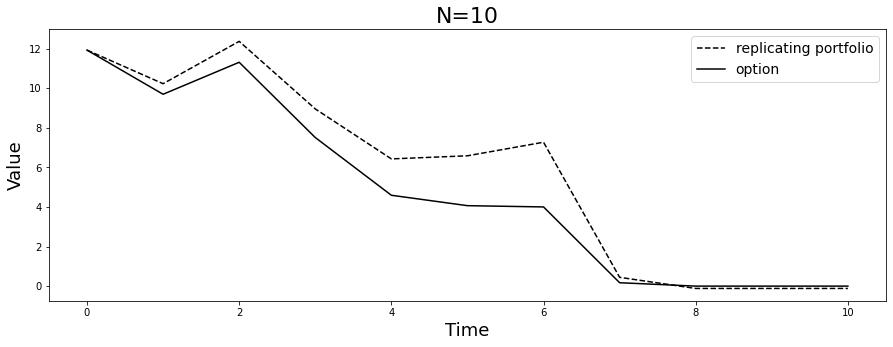

In [6]:
#We create an empty vector for the replication portfolio evolution
value=np.zeros(N+1)

#We create an empty vector for the option delta evolution
delta=np.zeros(N+1)

#We create an empty vector for the cash evolution
cash=np.zeros(N+1)

#We create an empty vector for the option value evolution
optionprice=np.zeros(N+1)

#The initial value of the option price is the BSM price
optionprice[0]=BS(S[0], K, T, r, sigma,"call" )

#The initial value of the replication portfolio is the option value
value[0]=optionprice[0]

#We calculate the delta
delta[0]=DeltaCall(S0,K,r,sigma,T)

#We calculate the cash
cash[0]=value[0]-delta[0]*S[0]

#For each time step
for i in range (1,N+1):
        
        #We calculate the replication portfolio
        value[i]=cash[i-1]*np.exp(r*T/N)+delta[i-1]*S[i]
        
        #We calculate the weights of the replication portfolio
        #if we are not at maturity time
        if i!=N:
            #The delta value
            delta[i]=DeltaCall(S[i], K, r, sigma, T*(N-i)/N)

            #We reassign the cash amount
            cash[i]=value[i]-delta[i]*S[i]

        #We calculate the option value.
        #Note that at maturity time, the value is the payoff
        #Note that the time to maturity decreases at each timestep
        if T*(N-i)/N==0:
            optionprice[i]=np.maximum(S[i]- K, 0)
        else:
            optionprice[i]=BS(S[i], K, T*(N-i)/N, r, sigma,"call" )

#We create a figure
plt.figure(figsize =(15 ,5))

#We set a title
plt.title("N="+str(N), fontsize=22)

#The x-axis title
plt.xlabel("Time", fontsize=18)

#The y-axis title
plt.ylabel("Value", fontsize=18)

#We do the plot of the replication portfolio evolution
plt.plot(value, "k--", label="replicating portfolio")

#We do the plot of the option evolution
plt.plot(optionprice,"k", label="option")

#We put the legend at the best place of the plot
plt.legend(loc="best", fontsize=14)

plt.savefig('C:/Users/ra_me/Dropbox/Doc/17- Book - Introduction to Financial Mathematics/gfx/9-Replication/DeltaHedging1.eps', format='eps', bbox_inches='tight', pad_inches=0)
#We show the plot
plt.show()

We repeat the experiment, but this time adjusting the portfolio 100 times in a year

Stock Inputs

In [7]:
#Asset Initial Value
S0=100
#Strike value
K=100
#Risk-free interest rate
r=0.0
#Volatility
sigma=0.3
#Time
T=1
#Number of time steps
N=100

MonteCarlo

In [8]:
#We create an empty vector to save the asset evolution
S=np.zeros(N+1)

#We assign the initial value
S[0]=S0

#We run our MonteCarlo
for i in range (1,N+1):
        S[i]=S[i-1]*np.exp((r-0.5*sigma**2)*T/N+sigma*np.random.normal(0,1)*np.sqrt(T/N))

Creating the replication portfolio

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


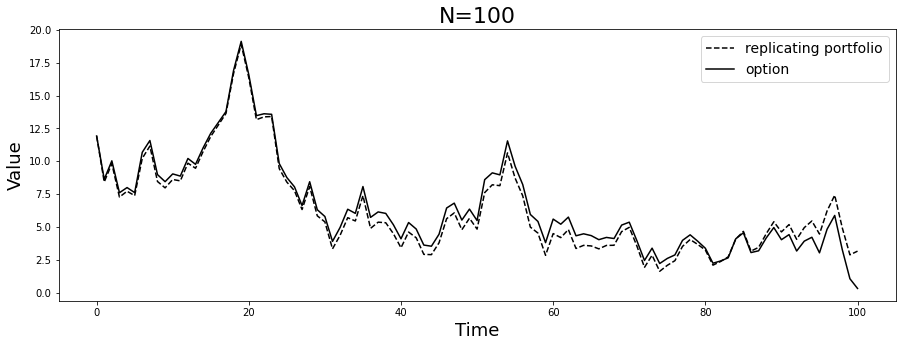

In [9]:
#We create an empty vector for the replication portfolio evolution
value=np.zeros(N+1)

#We create an empty vector for the option delta evolution
delta=np.zeros(N+1)

#We create an empty vector for the cash evolution
cash=np.zeros(N+1)

#We create an empty vector for the option value evolution
optionprice=np.zeros(N+1)

#The initial value of the option price is the BSM price
optionprice[0]=BS(S[0], K, T, r, sigma,"call" )

#The initial value of the replication portfolio is the option value
value[0]=optionprice[0]

#We calculate the delta
delta[0]=DeltaCall(S0,K,r,sigma,T)

#We calculate the cash
cash[0]=value[0]-delta[0]*S[0]

#For each time step
for i in range (1,N+1):
        
        #We calculate the replication portfolio
        value[i]=cash[i-1]*np.exp(r*T/N)+delta[i-1]*S[i]
        
        #We calculate the weights of the replication portfolio
        #if we are not at maturity time
        if i!=N:
            #The delta value
            delta[i]=DeltaCall(S[i], K, r, sigma, T*(N-i)/N)

            #We reassign the cash amount
            cash[i]=value[i]-delta[i]*S[i]

        #We calculate the option value.
        #Note that at maturity time, the value is the payoff
        #Note that the time to maturity decreases at each timestep
        if T*(N-i)/N==0:
            optionprice[i]=np.maximum(S[i]- K, 0)
        else:
            optionprice[i]=BS(S[i], K, T*(N-i)/N, r, sigma,"call" )

#We create a figure
plt.figure(figsize =(15 ,5))

#We set a title
plt.title("N="+str(N), fontsize=22)

#The x-axis title
plt.xlabel("Time", fontsize=18)

#The y-axis title
plt.ylabel("Value", fontsize=18)

#We do the plot of the replication portfolio evolution
plt.plot(value, "k--", label="replicating portfolio")

#We do the plot of the option evolution
plt.plot(optionprice,"k", label="option")

#We put the legend at the best place of the plot
plt.legend(loc="best", fontsize=14)

plt.savefig('C:/Users/ra_me/Dropbox/Doc/17- Book - Introduction to Financial Mathematics/gfx/9-Replication/DeltaHedging2.eps', format='eps', bbox_inches='tight', pad_inches=0)

#We show the plot
plt.show()